In [122]:
#main
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii

def readData(data):
    infile = data
    hdat1 = ascii.read(infile)
    return hdat1
    ffamean= np.mean(hdat1['ffa'])
    print (ffamean)
def seedata(data,data2,data3):
    na= data['ffa']/np.mean(data['ffa'])
    nb= data['ffb']/np.mean(data['ffb'])
    nc= data['ffc']/np.mean(data['ffc'])
    nd= data['ffd']/np.mean(data['ffd'])
    naerr= data ['fferra']/np.mean(data['ffa'])
    nberr= data ['fferrb']/np.mean(data['ffb'])
    ncerr= data ['fferrc']/np.mean(data['ffc'])
    nderr= data ['fferrd']/np.mean(data['ffd'])
    plt.errorbar(data ['day'], ffa, yerr= ffaerr, fmt='bo')
    plt.errorbar(data ['day'], ffb, yerr= ffberr, fmt='mo')
    plt.errorbar(data ['day'], ffc, yerr= ffcerr, fmt='yo')
    plt.errorbar(data ['day'], ffd, yerr= ffderr, fmt='go')
    plt.xlabel('day')
    plt.ylabel('flux')
def processdata(data,length):
    na= data ['ffa']/26.262549756447253
    nb= data ['ffb']/12.999001335285087
    nc= data ['ffc']/13.465030648055647
    nd= data ['ffd']/4.515175077885078
    nerra= data ['fferra']/26.262549756447253
    nerrb= data ['fferrb']/12.999001335285087
    nerrc= data ['fferrc']/13.465030648055647
    nerrd= data ['fferrd']/4.515175077885078
    dday= ((data['day'][-1])-(data['day'][0]))/(data['day'].size)
    newday=np.arange(data['day'].size)
    newday=newday*dday
    newday= newday+data[1]['day']
    newa=newday*0
    newb=newday*0
    newc=newday*0
    newd=newday*0
    newerra=newday*0
    newerrb=newday*0
    newerrc=newday*0
    newerrd=newday*0
    for i in range (data['day'].size):
        mask= (data['day']>newday[i]-length) & (data['day']<newday[i]+length)
        tempfluxa=na[mask]
        newa[i]= tempfluxa.mean()
        tempfluxb=nb[mask]
        newb[i]= tempfluxb.mean()
        tempfluxc=nc[mask]
        newc[i]= tempfluxc.mean()
        tempfluxd=nd[mask]
        newd[i]= tempfluxd.mean()
        tempfluxd=nd[mask]
        newd[i]= tempfluxd.mean()
    for i in range (data['day'].size):
        mask= (data['day']>newday[i]-length) & (data['day']<newday[i]+length)
        temperra=nerra[mask]
        newerra[i]= ((temperra**2).mean())**0.5
        temperrb=nerrb[mask]
        newerrb[i]= ((temperrb**2).mean())**0.5
        temperrc=nerrc[mask]
        newerrc[i]= ((temperrc**2).mean())**0.5
        temperrd=nerrd[mask]
        newerrd[i]= ((temperrd**2).mean())**0.5
    chi2ab=np.zeros(30)
    chi2cb=np.zeros(30)
    chi2db=np.zeros(30)
    chi2errab=np.zeros(30)
    chi2errcb=np.zeros(30)
    chi2errdb=np.zeros(30)
    for i in range (30):
        tempa= newa[1+i:]
        temperra= newerra[1+i:]
        tempb= newb[0:-(i+1)]
        temperrb= newerrb[0:-(i+1)]
        tempc= newc[1+i:]
        temperrc= newerrc[1+i:]
        tempd= newd[1+i:]
        temperrd= newerrd[1+i:]
        #tempb= tempb/tempb.mean()
        #tempa= tempa/tempa.mean()
        #tempc= tempc/tempc.mean()
        #tempd= tempd/tempd.mean()
    
        #temperrb= temperrb/temperrb.mean()
       # temperra= temperra/temperra.mean()
        #temperrc= temperrc/temperrc.mean()
        #temperrd= temperrd/temperrd.mean()
    
        tempchi2ab= ((tempb-tempa)**2)/((temperra**2)+(temperrb**2))
        tempchi2ab= tempchi2ab.sum()
        chi2ab[i] = tempchi2ab
        tempchi2cb= (tempb-tempc)**2/((temperrc**2)+(temperrb**2))
        tempchi2cb= tempchi2cb.sum()
        chi2cb[i] = tempchi2cb
        tempchi2db= (tempb-tempd)**2/((temperrb**2)+(temperrb**2))
        tempchi2db= tempchi2db.sum()
        chi2db[i] = tempchi2db
    plt.errorbar(newday-np.argmin(chi2ab)*dday, newa, yerr= newerra, fmt='bo')
    plt.errorbar(newday, newb, yerr= newerrb, fmt='mo')
    plt.errorbar(newday-(np.argmin(chi2cb)*dday), newc, yerr= newerrc, fmt='yo')
    plt.errorbar(newday-(np.argmin(chi2db)*dday), newd, yerr= newerrd, fmt='go')
    print(np.argmin(chi2ab)*dday)
    print(np.argmin(chi2cb)*dday)
    print(np.argmin(chi2db)*dday)
    return(chi2ab,chi2cb,chi2db)

104.7314285714286
32.50285714285715
72.22857142857144
29.813750000000002
35.23443181818182
75.88954545454546
18.807692307692307
31.346153846153847
65.82692307692308


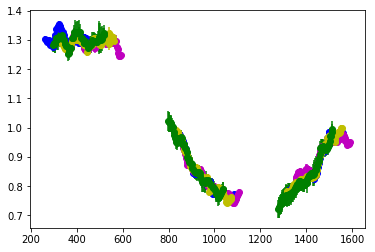

In [123]:
data1= readData('lens1lightcurve.dat')
data2= readData('lens2lightcurveJames.dat')
data3 = readData('lightcurve3.dat')
chi2ab1, chi2cb1, chi2db1 = processdata(data1,9)
chi2ab2, chi2cb2, chi2db2 = processdata(data2,9)
chi2ab3, chi2cb3, chi2db3 = processdata(data3,9)

In [124]:
chi2ab= chi2ab1+chi2ab2+chi2ab3
chi2cb= chi2cb1+chi2cb2+chi2cb3
chi2db= chi2db1+chi2db2+chi2db3

In [125]:
dday= 3.1605
print(np.argmin(chi2ab)*dday)
print(np.argmin(chi2cb)*dday)
print(np.argmin(chi2db)*dday)

28.444499999999998
37.926
82.173


104.7314285714286
32.50285714285715
72.22857142857144


(array([195.66810035, 166.74848557, 144.07187136, 122.30093157,
        100.67502772,  83.5971559 ,  69.93757162,  57.60969226,
         53.10999511,  60.07781489,  77.25035321,  99.53532491,
        121.17955172, 131.6768513 , 136.75523943, 137.79352988,
        128.16586818, 119.75132075, 106.30397727,  94.98203796,
         84.04041516,  74.94567081,  68.84960288,  72.66808257,
         73.31309064,  74.23322703,  71.65909295,  65.97471897,
         57.66607801,  47.56873377]),
 array([100.74621084,  84.00414621,  72.4359067 ,  62.27669672,
         53.9981227 ,  47.00417115,  39.20704482,  30.87290291,
         25.48530433,  23.48414048,  25.40623443,  30.80531231,
         37.93750871,  42.53944173,  47.63776771,  53.48354607,
         60.05612853,  69.87700708,  75.88887732,  81.47215914,
         83.64053328,  82.27936141,  75.01014693,  70.88243841,
         63.12304785,  59.22163364,  54.95915383,  52.89509737,
         51.59931443,  48.19682926]),
 array([114.5593421 , 115.45

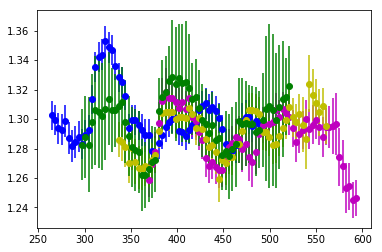

In [126]:
#plt.figure (figsize=(30,30))
processdata(data1,10)

29.813750000000002
35.23443181818182
75.88954545454546


(array([860.63673832, 764.75425134, 664.25256078, 563.42081351,
        463.17441934, 373.96040488, 291.34329459, 224.36876081,
        176.61560322, 143.7987184 , 120.81223823, 112.32347544,
        116.64295709, 129.04749709, 148.61409155, 173.04477219,
        203.23414535, 239.82812462, 279.67303191, 320.88062174,
        362.21775841, 411.83574638, 460.64185643, 510.02307782,
        551.51622565, 599.92371192, 657.65638503, 725.08624172,
        801.1264067 , 883.64465055]),
 array([735.7561684 , 653.95735136, 572.14614791, 488.67277355,
        405.83131757, 337.74397253, 277.27227505, 221.71409204,
        174.97163723, 141.47422945, 115.61974682,  96.34838537,
         83.45951286,  83.06089998,  92.06416796, 105.89241608,
        122.88817021, 145.33663055, 175.97801959, 203.48609114,
        228.81860718, 264.10064894, 296.45042032, 329.18738728,
        351.84226536, 378.05122817, 418.4080171 , 464.04220127,
        520.27301315, 586.31244629]),
 array([2219.60381994, 2083.

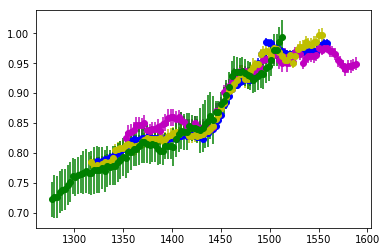

In [127]:
processdata(data2,9)

18.807692307692307
31.346153846153847
65.82692307692308


(array([ 306.85981354,  247.78424808,  199.06631115,  161.13303094,
         133.33692279,  113.20585705,  100.57021152,  102.09087439,
         116.14696892,  135.51478836,  165.92660286,  202.57601162,
         242.55796178,  283.37690557,  327.68298728,  376.70202118,
         429.66421628,  484.46349794,  542.56443903,  602.85256852,
         653.48701317,  701.73657221,  750.79163126,  801.08664758,
         856.53790254,  913.25490922,  976.58380844, 1038.46397205,
        1092.47114562, 1145.58296552]),
 array([504.63730907, 419.31196652, 346.60761744, 280.08762256,
        222.21020208, 175.15078583, 137.05829617, 105.85533582,
         87.37389086,  74.37337293,  69.45878175,  70.90701114,
         76.0209943 ,  83.10321652,  95.148628  , 114.71210504,
        139.44346742, 166.30617728, 198.79877084, 236.58001201,
        268.59487636, 298.55286402, 328.53115074, 358.22540618,
        390.91112136, 425.17240942, 463.8927022 , 502.30764752,
        538.20254335, 574.36182001])

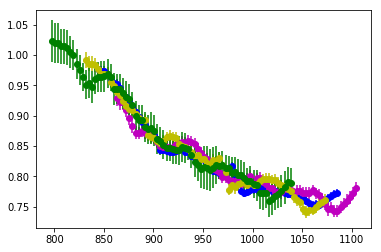

In [128]:
processdata(data3,9)

In [129]:
(np.mean(data1['ffa'])+np.mean(data2['ffa'])+np.mean(data3['ffa']))/3


26.262549756447253

In [130]:

(np.mean(data1['ffb'])+np.mean(data2['ffb'])+np.mean(data3['ffb']))/3

12.999001335285087

In [131]:
(np.mean(data1['ffc'])+np.mean(data2['ffc'])+np.mean(data3['ffc']))/3


13.465030648055647

In [132]:
(np.mean(data1['ffd'])+np.mean(data2['ffd'])+np.mean(data3['ffd']))/3

4.515175077885078

In [164]:
def processdata2(data,length):
    na= data ['ffa']/26.262549756447253
    nb= data ['ffb']/12.999001335285087
    nc= data ['ffc']/13.465030648055647
    nd= data ['ffd']/4.515175077885078
    nerra= data ['fferra']/26.262549756447253
    nerrb= data ['fferrb']/12.999001335285087
    nerrc= data ['fferrc']/13.465030648055647
    nerrd= data ['fferrd']/4.515175077885078
    dday= ((data['day'][-1])-(data['day'][0]))/(data['day'].size)
    newday=np.arange(data['day'].size)
    newday=newday*dday
    newday= newday+data[1]['day']
    newa=newday*0
    newb=newday*0
    newc=newday*0
    newd=newday*0
    newerra=newday*0
    newerrb=newday*0
    newerrc=newday*0
    newerrd=newday*0
    for i in range (data['day'].size):
        mask= (data['day']>newday[i]-length) & (data['day']<newday[i]+length)
        tempfluxa=na[mask]
        newa[i]= tempfluxa.mean()
        tempfluxb=nb[mask]
        newb[i]= tempfluxb.mean()
        tempfluxc=nc[mask]
        newc[i]= tempfluxc.mean()
        tempfluxd=nd[mask]
        newd[i]= tempfluxd.mean()
        tempfluxd=nd[mask]
        newd[i]= tempfluxd.mean()
    for i in range (data['day'].size):
        mask= (data['day']>newday[i]-length) & (data['day']<newday[i]+length)
        temperra=nerra[mask]
        newerra[i]= ((temperra**2).mean())**0.5
        temperrb=nerrb[mask]
        newerrb[i]= ((temperrb**2).mean())**0.5
        temperrc=nerrc[mask]
        newerrc[i]= ((temperrc**2).mean())**0.5
        temperrd=nerrd[mask]
        newerrd[i]= ((temperrd**2).mean())**0.5
    chi2ab=np.zeros(30)
    chi2cb=np.zeros(30)
    chi2db=np.zeros(30)
    chi2errab=np.zeros(30)
    chi2errcb=np.zeros(30)
    chi2errdb=np.zeros(30)
    for i in range (30):
        tempa= newa[1+i:]
        temperra= newerra[1+i:]
        tempb= newb[0:-(i+1)]
        temperrb= newerrb[0:-(i+1)]
        tempc= newc[1+i:]
        temperrc= newerrc[1+i:]
        tempd= newd[1+i:]
        temperrd= newerrd[1+i:]
        #tempb= tempb/tempb.mean()
        #tempa= tempa/tempa.mean()
        #tempc= tempc/tempc.mean()
        #tempd= tempd/tempd.mean()
    
        #temperrb= temperrb/temperrb.mean()
       # temperra= temperra/temperra.mean()
        #temperrc= temperrc/temperrc.mean()
        #temperrd= temperrd/temperrd.mean()
    
        tempchi2ab= ((tempb-tempa)**2)/((temperra**2)+(temperrb**2))
        tempchi2ab= tempchi2ab.sum()
        chi2ab[i] = tempchi2ab
        tempchi2cb= (tempb-tempc)**2/((temperrc**2)+(temperrb**2))
        tempchi2cb= tempchi2cb.sum()
        chi2cb[i] = tempchi2cb
        tempchi2db= (tempb-tempd)**2/((temperrb**2)+(temperrb**2))
        tempchi2db= tempchi2db.sum()
        chi2db[i] = tempchi2db
    plt.errorbar(newday-28.444499999999998, newa, yerr= newerra, fmt='bo')
    plt.errorbar(newday, newb, yerr= newerrb, fmt='mo')
    plt.errorbar(newday-(37.926), newc, yerr= newerrc, fmt='yo')
    plt.errorbar(newday-(82.173), newd, yerr= newerrd, fmt='go')

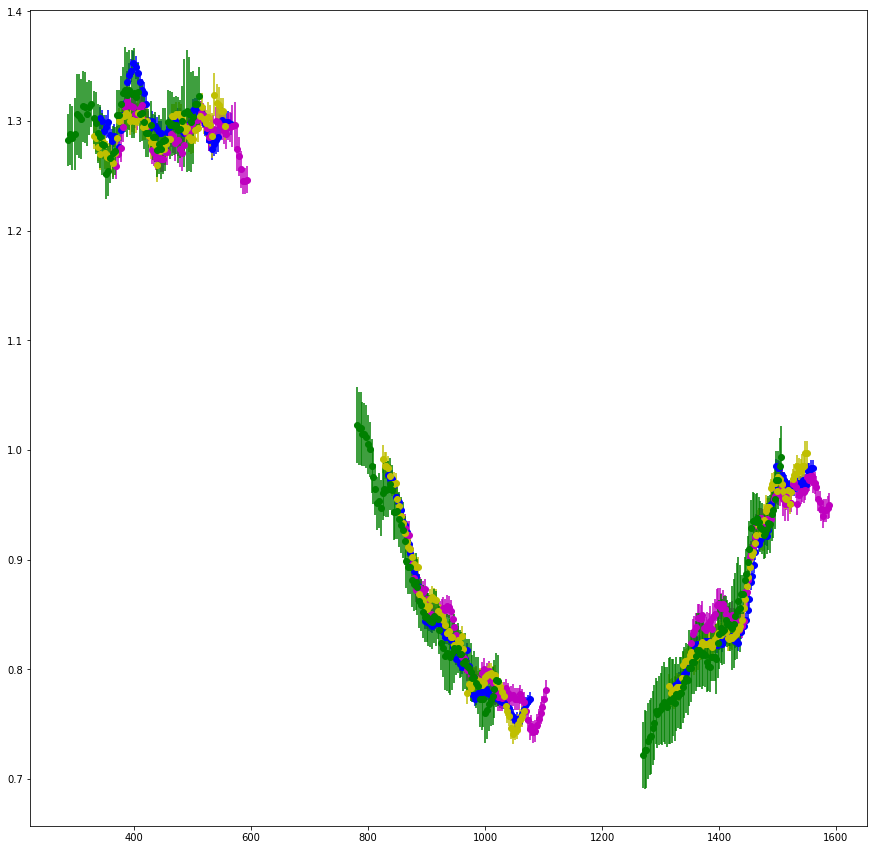

In [165]:
plt.figure (figsize=(15,15))
processdata2(data1,9)
processdata2(data2,9)
processdata2(data3,9)

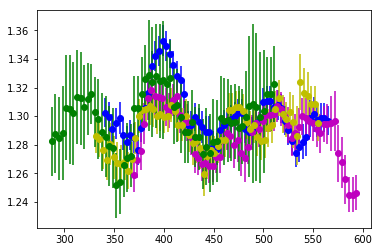

In [141]:



processdata2(data1,9)

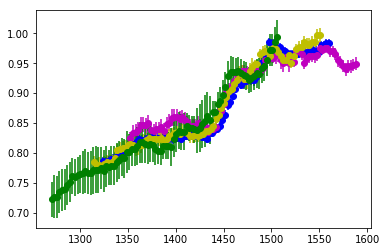

In [142]:



processdata2(data2,9)

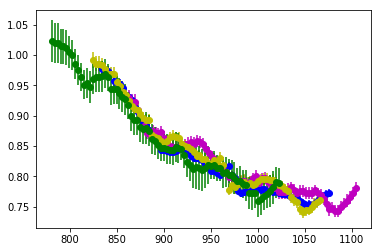

In [143]:
processdata2(data3,9)

In [160]:
def processdata3(data,length):
    na= data ['ffa']/26.262549756447253
    nb= data ['ffb']/12.999001335285087
    nc= data ['ffc']/13.465030648055647
    nd= data ['ffd']/4.515175077885078
    nerra= data ['fferra']/26.262549756447253
    nerrb= data ['fferrb']/12.999001335285087
    nerrc= data ['fferrc']/13.465030648055647
    nerrd= data ['fferrd']/4.515175077885078

    plt.errorbar(data ['day']-28.444499999999998, na, yerr= nerra, fmt='bo')
    plt.errorbar(data ['day'], nb, yerr= nerrb, fmt='mo')
    plt.errorbar(data ['day']-(37.926), nc, yerr= nerrc, fmt='yo')
    plt.errorbar(data ['day']-(82.173), nd, yerr= nerrd, fmt='go')

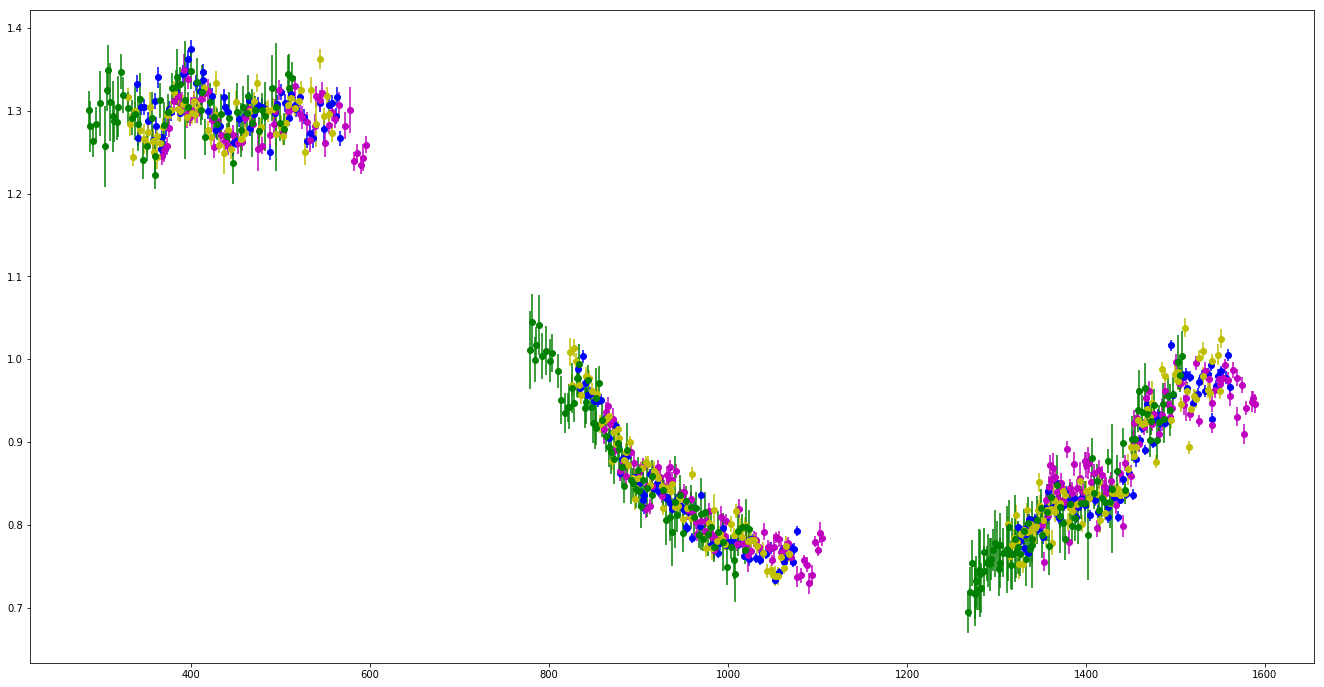

In [161]:
plt.figure (figsize=(23,12))
processdata3(data1,9)
processdata3(data2,9)
processdata3(data3,9)

hba= 24.6/28.4
hbc= 27.5/37.9
hbd= 58.1/82.2
hmean= (hba+hbc+hbd)/3

In [162]:
hba= 24.6/28.4
hbc= 27.5/37.9
hbd= 58.1/82.2
hmean= (hba+hbc+hbd)/3
print(hmean)

0.766201167570964


In [166]:
print(hba)
print(hbc)
print(hbd)

0.8661971830985916
0.7255936675461742
0.7068126520681265


In [174]:
hobs= np.array([28.4,37.9,82.2]) 
hmod= np.array([24.6,27.5,58.1])
h= hmod/hobs
print(np.mean(h))
print(h.std())

0.766201167570964
0.07112235455723613
